#### AAE 722 Homework 3 - Charles Voigt

In [2]:
#Housekeeping - Importing Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly, sklearn_sm)
from sklearn.model_selection import train_test_split, cross_validate, LeaveOneOut
import statsmodels.api as sm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import PolynomialFeatures

##### Chapter 7 Question 4

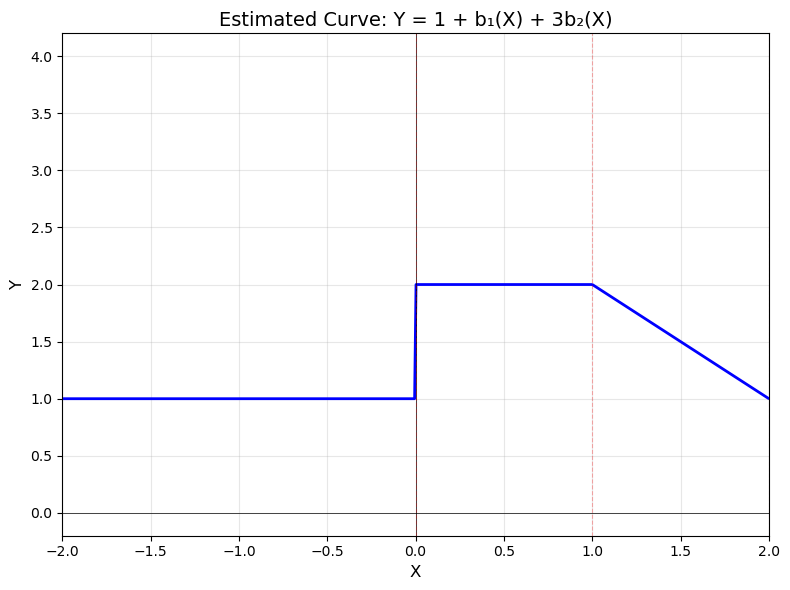

In [3]:
# Define the basis functions
def b1(X):
   term1 = ((0 <= X) & (X <= 2)).astype(float)
   term2 = (X - 1) * ((1 <= X) & (X <= 2)).astype(float)
   return term1 - term2

def b2(X):
    term1 = (X - 3) * ((3 <= X) & (X <= 4)).astype(float)
    term2 = ((4 < X) & (X <= 5)).astype(float)
    return term1 + term2

# Coefficients
beta0 = 1
beta1 = 1
beta2 = 3

# Create X values
X = np.linspace(-2, 6, 1000)

# Calculate Y = beta0 + beta1 * b1(X) + beta2 * b2(X)
Y = beta0 + beta1 * b1(X) + beta2 * b2(X)

# Plot the curve
plt.figure(figsize=(8, 6))
plt.plot(X, Y, 'b-', linewidth=2)
plt.grid(True, alpha=0.3)
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.title('Estimated Curve: Y = 1 + b₁(X) + 3b₂(X)', fontsize=14)
plt.axhline(y=0, color='k', linestyle='-', linewidth=0.5)
plt.axvline(x=0, color='k', linestyle='-', linewidth=0.5)

# Add vertical lines at key points
for x_val in [0, 1, 2, 3, 4, 5]:
    plt.axvline(x=x_val, color='r', linestyle='--', alpha=0.3, linewidth=0.8)

plt.xlim(-2, 2)
plt.tight_layout()
plt.show()


##### Discussion

The y intercept for this function is 1 where X < 0, and 2 where X > 0. from X = -2 to 1, the slope is 0. from X = 1 to 2, the slope is -1.


##### Chapter 8 Question 2

First, lets define the boosted model as: $$
f(x) = \sum_{b=1}^{B} \lambda \hat{f}^b(x)$$
 Boosting using depth-one trees is an additive model because each term only contains a single variable it is deciding on. (d =1). Because d refers to the interaction depth, and d splits can at most contain d variables, it is simply the sum of the functions deciding on only one predictor. Thus, the above equation is also of the following form: $$f(x) = \sum_{j=1}^{p} f_j(X_j)$$

#### Chapter 8 Question 3

<>:26: SyntaxWarning: invalid escape sequence '\h'
<>:26: SyntaxWarning: invalid escape sequence '\h'
C:\Users\cvoig\AppData\Local\Temp\ipykernel_17040\2563418859.py:26: SyntaxWarning: invalid escape sequence '\h'
  plt.title('Gini Index, Classification Error, and Entropy vs. $\hat{p}_{m1}$', fontsize=14)


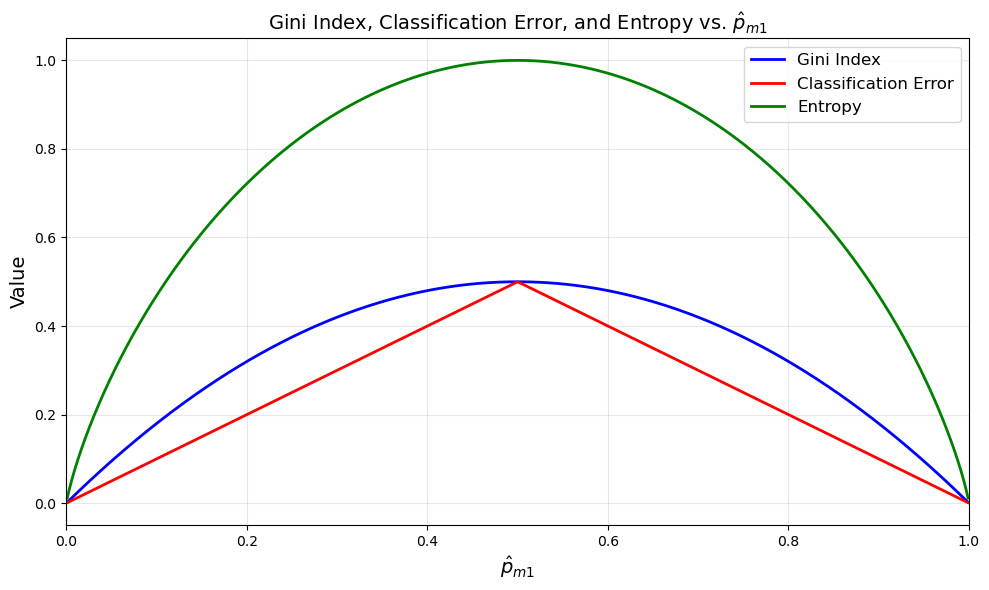

In [4]:
# Define p_m1 ranging from 0 to 1
p_m1 = np.linspace(0.001, 0.999, 1000)  # Avoid exactly 0 and 1 to prevent log(0)
p_m2 = 1 - p_m1

p_m = np.array([p_m1, p_m2])
k = [0, 1]
gini = sum(p_m[k] * (1 - p_m[k]) for k in k)


# Calculate Classification Error
# Error = 1 - max(p_mk)
classification_error = 1 - np.maximum(p_m1, p_m2)

# Calculate Entropy (Cross-Entropy)
# Entropy = -sum(p_mk * log(p_mk))
entropy = -(p_m1 * np.log2(p_m1) + p_m2 * np.log2(p_m2))

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(p_m1, gini, label='Gini Index', linewidth=2, color='blue')
plt.plot(p_m1, classification_error, label='Classification Error', linewidth=2, color='red')
plt.plot(p_m1, entropy, label='Entropy', linewidth=2, color='green')

plt.xlabel(r'$\hat{p}_{m1}$', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Gini Index, Classification Error, and Entropy vs. $\hat{p}_{m1}$', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, alpha=0.3)
plt.xlim(0, 1)
plt.tight_layout()
plt.show()